In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

In [40]:
df = pd.read_csv("data-p2/filtered_mimic3d.csv")
print(df.head())

   hadm_id gender  age  LOSdays admit_type             admit_location  \
0   100003      M   59     4.04  EMERGENCY       EMERGENCY ROOM ADMIT   
1   100011      M   21    14.38  EMERGENCY  CLINIC REFERRAL/PREMATURE   
2   100036      F   82    10.04  EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3   100060      F   48     4.46  EMERGENCY       EMERGENCY ROOM ADMIT   
4   100069      F   33     0.71  EMERGENCY  PHYS REFERRAL/NORMAL DELI   

                                     AdmitDiagnosis insurance       religion  \
0                                    UPPER GI BLEED   Private  NOT SPECIFIED   
1  MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES  Medicaid  NOT SPECIFIED   
2                                               CHF  Medicare       CATHOLIC   
3                                          OVERDOSE  Medicare       CATHOLIC   
4                               ORGAN DONOR ACCOUNT   Private       CATHOLIC   

  marital_status  ... NumMicroLabs  NumNotes  NumOutput  NumRx NumProcEvents  \


### variable investigation

In [41]:
df.dtypes

hadm_id               int64
gender               object
age                   int64
LOSdays             float64
admit_type           object
admit_location       object
AdmitDiagnosis       object
insurance            object
religion             object
marital_status       object
ethnicity            object
NumCallouts         float64
NumDiagnosis        float64
NumProcs            float64
AdmitProcedure       object
NumCPTevents        float64
NumInput            float64
NumLabs             float64
NumMicroLabs        float64
NumNotes            float64
NumOutput           float64
NumRx               float64
NumProcEvents       float64
NumTransfers        float64
NumChartEvents      float64
ExpiredHospital       int64
TotalNumInteract    float64
LOSgroupNum           int64
dtype: object

In [42]:
dff = df[['gender','age','LOSdays','admit_type','insurance','NumNotes','ExpiredHospital']]
dff['gender'] = dff['gender'].map({'M': 0, 'F': 1})

C:\Users\mairi\AppData\Local\Temp\ipykernel_41468\3408548984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['gender'] = dff['gender'].map({'M': 0, 'F': 1})


In [43]:
df_one_hot = pd.get_dummies(dff[['admit_type','insurance']], drop_first=False).astype(int) # for now; can drop first later

# binary_encoder = ce.BinaryEncoder(cols=['admit_type', 'insurance'], drop_invariant=True)
# df_binary = binary_encoder.fit_transform(df[['admit_type', 'insurance']])

# Select numeric columns
df_numeric = dff.select_dtypes(include=['float64', 'int64'])

# Concatenate everything
df_concat = pd.concat([df_numeric, df_one_hot],axis=1)
df_concat                     

,gender,age,LOSdays,NumNotes,ExpiredHospital,admit_type_ELECTIVE,admit_type_EMERGENCY,admit_type_NEWBORN,admit_type_URGENT,insurance_Government,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay
0,0,59,4.04,1.59,0,0,1,0,0,0,0,0,1,0
1,0,21,14.38,0.21,0,0,1,0,0,0,1,0,0,0
2,1,82,10.04,0.21,0,0,1,0,0,0,0,1,0,0
3,1,48,4.46,0.25,0,0,1,0,0,0,0,1,0,0
4,1,33,0.71,23.80,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,0,73,6.88,0.61,0,0,0,0,1,0,0,1,0,0
2972,0,66,6.38,0.25,0,0,1,0,0,0,0,1,0,0
2973,0,77,4.75,2.57,1,0,1,0,0,0,0,1,0,0
2974,0,40,10.04,0.02,0,0,1,0,0,0,1,0,0,0


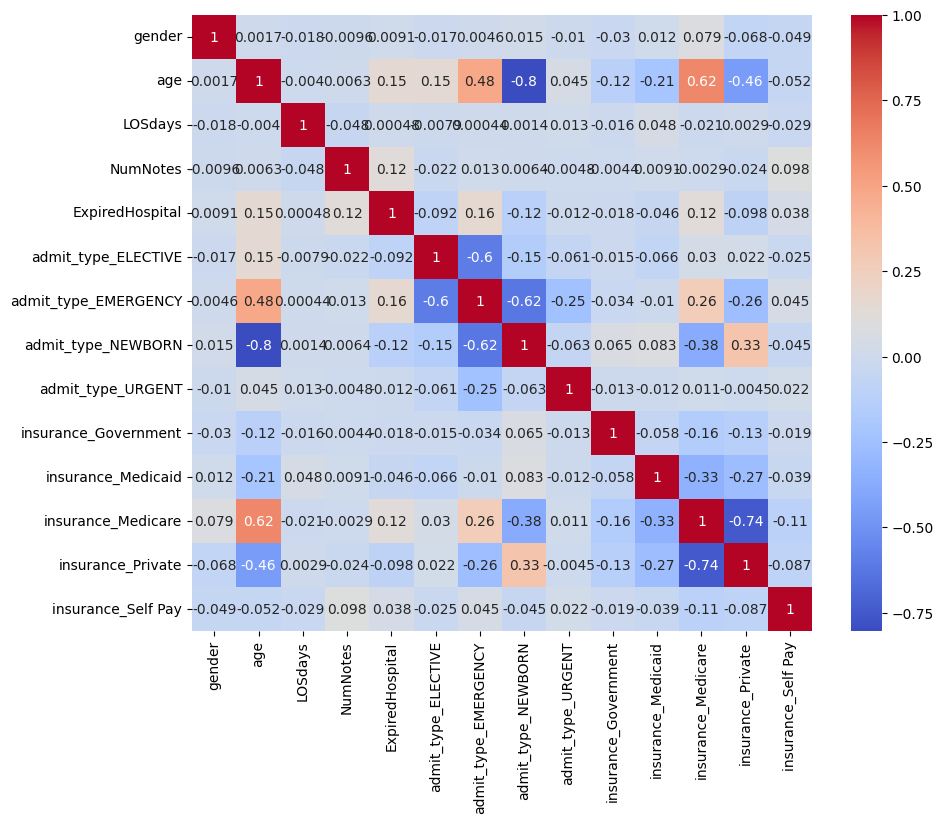

In [11]:
correlation_matrix = df_concat.corr()
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

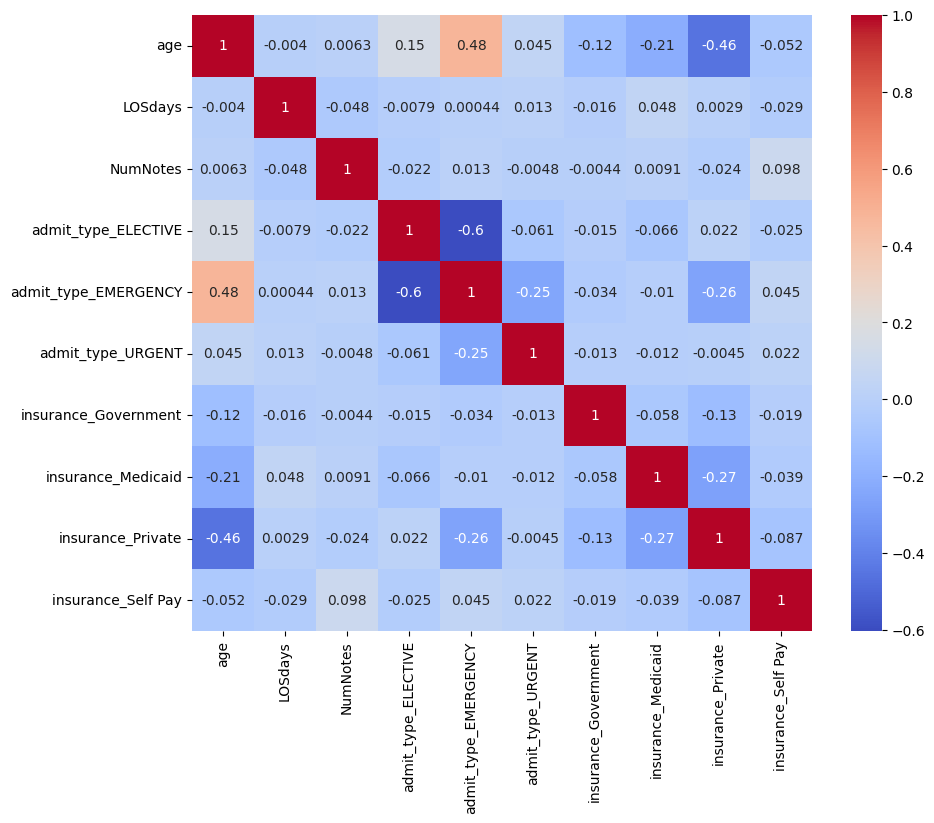

In [16]:
df_concat2 = df_concat.drop(columns=['gender','admit_type_NEWBORN','insurance_Medicare','ExpiredHospital'])
correlation_matrix = df_concat2.corr()
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

### more variable investigation

In [45]:
df_one_hot = pd.get_dummies(df[['gender', 'admit_type', 'admit_location','insurance', 'marital_status']], drop_first=True)

# Select numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64']).drop(['hadm_id'], axis=1)

# Concatenate everything
df_concat3 = pd.concat([df_numeric, df_one_hot], axis=1)

In [48]:
correlation_matrix = df_concat3.corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
# plt.show()

# Set a threshold for "high" correlation (absolute value)
threshold = 0.7

# Find pairs of highly correlated variables
high_correlation_pairs = []

# Iterate over the matrix and store pairs that meet the threshold
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append(
                (correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            )

# Display the pairs of highly correlated variables
high_correlation_pairs

[('age', 'admit_type_NEWBORN', np.float64(-0.8030021682569928)),
 ('NumDiagnosis', 'NumProcs', np.float64(0.7817811783002626)),
 ('NumDiagnosis', 'NumNotes', np.float64(0.8267987124283622)),
 ('NumDiagnosis', 'NumTransfers', np.float64(0.8174378745969402)),
 ('NumProcs', 'NumLabs', np.float64(0.7819874907387835)),
 ('NumProcs', 'NumNotes', np.float64(0.8875472274673377)),
 ('NumLabs', 'NumNotes', np.float64(0.7206638168059863)),
 ('NumNotes', 'NumTransfers', np.float64(0.8144027911753577)),
 ('NumChartEvents', 'TotalNumInteract', np.float64(0.9739286923644066)),
 ('admit_type_EMERGENCY',
  'admit_location_PHYS REFERRAL/NORMAL DELI',
  np.float64(-0.7903642741497279)),
 ('insurance_Medicare', 'insurance_Private', np.float64(-0.7414678885487047))]

### sparse PCA

In [35]:
import numpy as np
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

X = df_concat2.drop(columns=['LOSdays']) # Replace with your actual variables
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.replace([np.inf, -np.inf], np.nan)
X_numeric = X.dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SparsePCA
# n_components: Number of sparse components to extract
# alpha: Regularization parameter controlling sparsity (higher values enforce more sparsity)
spca = SparsePCA(n_components=1, alpha=1)

# Fit the model and transform the data
X_spca = spca.fit_transform(X_scaled)

# Components extracted
components = spca.components_

# Print the transformed data and components
print("Transformed Data (Sparse PCA):\n", X_spca)
print("\nSparse PCA Components:\n", components)


Transformed Data (Sparse PCA):
 [[0.1055902 ]
 [0.3152439 ]
 [1.44826012]
 ...
 [1.35418025]
 [0.67357398]
 [0.16205564]]

Sparse PCA Components:
 [[ 0.49828666  0.00876956 -0.34240403  0.65216287 -0.10366462  0.
   0.0054583  -0.4444734   0.02727318]]


C:\Users\mairi\AppData\Local\Temp\ipykernel_41468\2659002193.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [24]:
for i, component in enumerate(components):
    print(f"Component {i+1}:")
    non_zero_indices = np.where(component != 0)[0]
    non_zero_vars = X.columns[non_zero_indices].tolist()
    print("  Non-zero variables:", non_zero_vars)
    print("  Coefficients:", component[non_zero_indices])

Component 1:
  Non-zero variables: ['age', 'NumNotes', 'admit_type_ELECTIVE', 'admit_type_EMERGENCY', 'admit_type_URGENT', 'insurance_Medicaid', 'insurance_Private', 'insurance_Self Pay']
  Coefficients: [ 0.49828666  0.00876956 -0.34240403  0.65216287 -0.10366462  0.0054583
 -0.4444734   0.02727318]


In [25]:
for i, component in enumerate(components):
    print(f"Component {i+1}:")
    zero_indices = np.where(component == 0)[0]
    zero_vars = X.columns[zero_indices].tolist()
    print("  Zero variables:", zero_vars)
    print("  Coefficients:", component[zero_indices])

Component 1:
  Zero variables: ['insurance_Government']
  Coefficients: [0.]


In [50]:
print([i for i in df_concat.dtypes])

[dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype(

### lasso

In [28]:
from sklearn.linear_model import Lasso

y = df_concat2['LOSdays']
model = Lasso(alpha=0.1)
model.fit(X, y)
importance = model.coef_
importance

array([ 3.97124938e-04, -6.45605335e-03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  9.21417267e-01,  0.00000000e+00,
       -0.00000000e+00])

### mutual info

In [46]:
X = df_concat3.drop(columns=['LOSdays']) # Replace with your actual variables
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.replace([np.inf, -np.inf], np.nan)
discrete_features = X.dtypes == int
y = df_concat2['LOSdays']

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores # show a few features with their MI scores

C:\Users\mairi\AppData\Local\Temp\ipykernel_41468\3917483840.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


NumTransfers                                2.483705
NumCallouts                                 1.443417
LOSgroupNum                                 1.358002
NumProcs                                    1.228611
NumDiagnosis                                0.814616
NumMicroLabs                                0.779714
NumCPTevents                                0.556992
NumNotes                                    0.520503
NumRx                                       0.252980
NumLabs                                     0.212743
TotalNumInteract                            0.189713
NumChartEvents                              0.184332
NumProcEvents                               0.181455
NumOutput                                   0.111367
NumInput                                    0.071424
admit_location_PHYS REFERRAL/NORMAL DELI    0.069852
admit_type_EMERGENCY                        0.067502
age                                         0.058486
admit_type_NEWBORN                          0.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_numeric = X.dropna()

# X_numeric = X.apply(pd.to_numeric, errors='coerce')
# X_numeric = X_numeric.dropna()

constant_columns = X_numeric.loc[:, X_numeric.apply(lambda x: x.nunique() == 1)]
X_numeric = X_numeric.drop(columns=constant_columns.columns)

X_numeric_with_constant = add_constant(X_numeric)

vif = pd.DataFrame()
vif["Variable"] = X_numeric_with_constant.columns
vif["VIF"] = [variance_inflation_factor(X_numeric_with_constant.values, i) for i in range(X_numeric_with_constant.shape[1])]

print(vif)

c:\Users\mairi\code\MAT-4376E-F24\.conda\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                    Variable         VIF
0                                      const  361.243558
1                                        age    5.024147
2                                NumCallouts         inf
3                               NumDiagnosis         inf
4                                   NumProcs         inf
5                               NumCPTevents         inf
6                                   NumInput         inf
7                                    NumLabs         inf
8                               NumMicroLabs         inf
9                                   NumNotes         inf
10                                 NumOutput         inf
11                                     NumRx         inf
12                             NumProcEvents         inf
13                              NumTransfers         inf
14                            NumChartEvents         inf
15                           ExpiredHospital    1.411325
16                          Tot